# **215530C - Jesuharun K.S**
> ### ***CM3720 - Machine Learning***
> ### ***Telco Customer Churn Prediction***

In [1]:
import sys
sys.executable

'c:\\users\\sean\\appdata\\local\\programs\\python\\python39\\python.exe'

In [51]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.gridspec import GridSpec

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from itertools import product

### **About Dataset**

#### *The dataset contains information about a Telco company that provided home phone and Internet services to 7043 customers in California. It indicates which customers have left or stayed for their service. Multiple important demographics are included for each customer.*

- Services that each Customer has signed up for :
  1. **Phone Service** - *Whether the customer has a phone service or not (Yes, No)*
  2. **Multiple lines** - *Whether the customer has multiple lines or not (Yes, No, No phone service)*
  3. **Internet Service** - *Customer’s internet service provider (DSL, Fiber optic, No)*
  4. **Online Security** - *Whether the customer has online security or not (Yes, No, No internet service)*
  5. **Online Backup** - *Whether the customer has online backup or not (Yes, No, No internet service)*
  6. **Device Protection** - *Whether the customer has device protection or not (Yes, No, No internet service)*
  7. **Tech Support** - *Whether the customer has tech support or not (Yes, No, No internet service)*
  8. **Streaming TV** - *Whether the customer has streaming TV or not (Yes, No, No internet service)*
  9.  **Streaming Movies** - *Whether the customer has streaming movies or not (Yes, No, No internet service)*
- Customer Account Information :
  1. **CustomerId** - *Unique value to identify a Customer*
  2. **Tenure** - *Number of months the customer has stayed with the company*
  3. **Contract** - *The contract term of the customer (Month-to-month, One year, Two year)*
  4. **Payment method** - *The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card*
  5. **Paperless Billing** - *Whether the customer has paperless billing or not (Yes, No)*
  6. **Monthly Charges** - *The amount charged to the customer monthly*
  7. **Total charges** - *The total amount charged to the customer*
- Demographic Information about Customers :
  1. **Gender** - *Whether the customer is a male or a female*
  2. **Senior Citizen** - *Whether the customer is a senior citizen or not (1, 0)*
  3. **Partner** - *Whether the customer has a partner or not (Yes, No)*
  4. **dependents** - *Whether the customer has dependents or not (Yes, No)*
- Column **Churn** indicates the customers who has **Left (Yes)** or **Not-Left (No)**

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Listing unique values in each Feature variables
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"{column} => Values : {unique_values} Count : {unique_count}")
    print()

customerID => Values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] Count : 7043

gender => Values : ['Female' 'Male'] Count : 2

SeniorCitizen => Values : [0 1] Count : 2

Partner => Values : ['Yes' 'No'] Count : 2

Dependents => Values : ['No' 'Yes'] Count : 2

tenure => Values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Count : 73

PhoneService => Values : ['No' 'Yes'] Count : 2

MultipleLines => Values : ['No phone service' 'No' 'Yes'] Count : 3

InternetService => Values : ['DSL' 'Fiber optic' 'No'] Count : 3

OnlineSecurity => Values : ['No' 'Yes' 'No internet service'] Count : 3

OnlineBackup => Values : ['Yes' 'No' 'No internet service'] Count : 3

DeviceProtection => Values : ['No' 'Yes' 'No internet service'] Count : 3

TechSupport => Values : ['No' 'Yes' 'N

### **Step 1: Data Cleaning**

In [5]:
# Removing the CustomerId Column
df = df.drop(columns=["customerID"])

> ***Note:** The **7043 unique values in CutomerID** field indicates that each customer is **Independent** and there were **No Duplicate** entries were recoreded. We can drop this columns because this data is not needed to include in the model, it will add noise to the model rather than adding any meaningful information.*

In [6]:
# Define the mapping for SeniorCitizen
senior_citizen_mapping = {0: 'No', 1: 'Yes'}
# Apply the mapping to SeniorCitizen Column
df['SeniorCitizen'] = df['SeniorCitizen'].map(senior_citizen_mapping)

In [7]:
# Convert TotalCharges to Numerical values
df['TotalCharges_Numeric'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

> ***Note:** **errors='coerce'** : Replaces non-convertible values with **NaN***

In [8]:
# Listing out the missing/null values in each Feature variable.
df.isnull().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn                    0
TotalCharges_Numeric    11
dtype: int64

> ****Note:*** The dataset contain **Missing values (NaN)** in the converted **TotalChargers_Numeric** field, It means **Non-convertable strings present in the TotalCharges** field*

In [9]:
# Viewing the Non-Convertable strings present in the TotalCharges Field
nan_rows = df[df['TotalCharges_Numeric'].isna()]
nan_rows[['TotalCharges', 'MonthlyCharges', 'tenure']]

,TotalCharges,MonthlyCharges,tenure
488,,52.55,0
753,,20.25,0
936,,80.85,0
1082,,25.75,0
1340,,56.05,0
3331,,19.85,0
3826,,25.35,0
4380,,20.00,0
5218,,19.70,0
6670,,73.35,0


> ****Note:*** **TotalCharges** column has some **missing values represented as Empty strings**, which indicate that these **charges are undefined** for those rows. Upon observing a pattern, it is evident that approximately **TotalCharges = MonthlyCharges * Tenure**, and the **missing values correspond to rows where Tenure = 0**, **meaning no charges are accrued.** Therefore, in such cases, the **TotalCharges can be replaced with 0.** **Assuming that there is no pre-payment need to be done. Payment is done once the month is completed only.***

In [10]:
# Replace NaN values in 'TotalChargers_Numeric' with the calculated value
# Typically assigning TotalChargers_Numeric values as 0 for customers with Tenure = 0
df['TotalCharges_Numeric'] = df['TotalCharges_Numeric'].fillna(df['MonthlyCharges'] * df['tenure'])

# Droping TotalCharges Feature
df = df.drop(columns=['TotalCharges'])
# Renaming TotalCharges_Numeric to TotalCharges
df.rename(columns={'TotalCharges_Numeric': 'TotalCharges'}, inplace=True)

In [11]:
# Getting the count of customers who didn't have either Phone or Internet service.
df[(df['PhoneService'] == "No") & (df['InternetService'] == "No")].shape[0]

0

> ****Note:*** There are **No such Customers who have both Phone Service and Internet Service marked as "No" simultaneously.** That means **to be a customer he/she should have either Phone or Internet service.***

### **Step 2: Data Visualization**

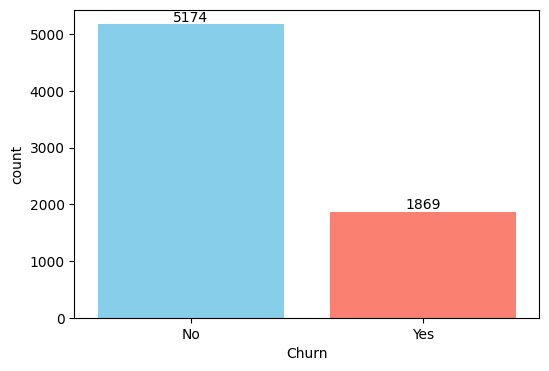

In [12]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='Churn', data=df)

# Add colors to bars (manually)
bar_colors = ['skyblue', 'salmon']  # Custom colors for each bar
for bar, color in zip(ax.patches, bar_colors):
    bar.set_facecolor(color)

# Counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

> ****Note:*** The number of **Customers who Churn** is **significantly lower** compared to those who do not churn. So this is an **Imbalanced Dataset Classification Problem**. This is **3 : 1 ratio for Not-Churn : Churn***

#### **Categorical Variable with Target Variable Visualization**

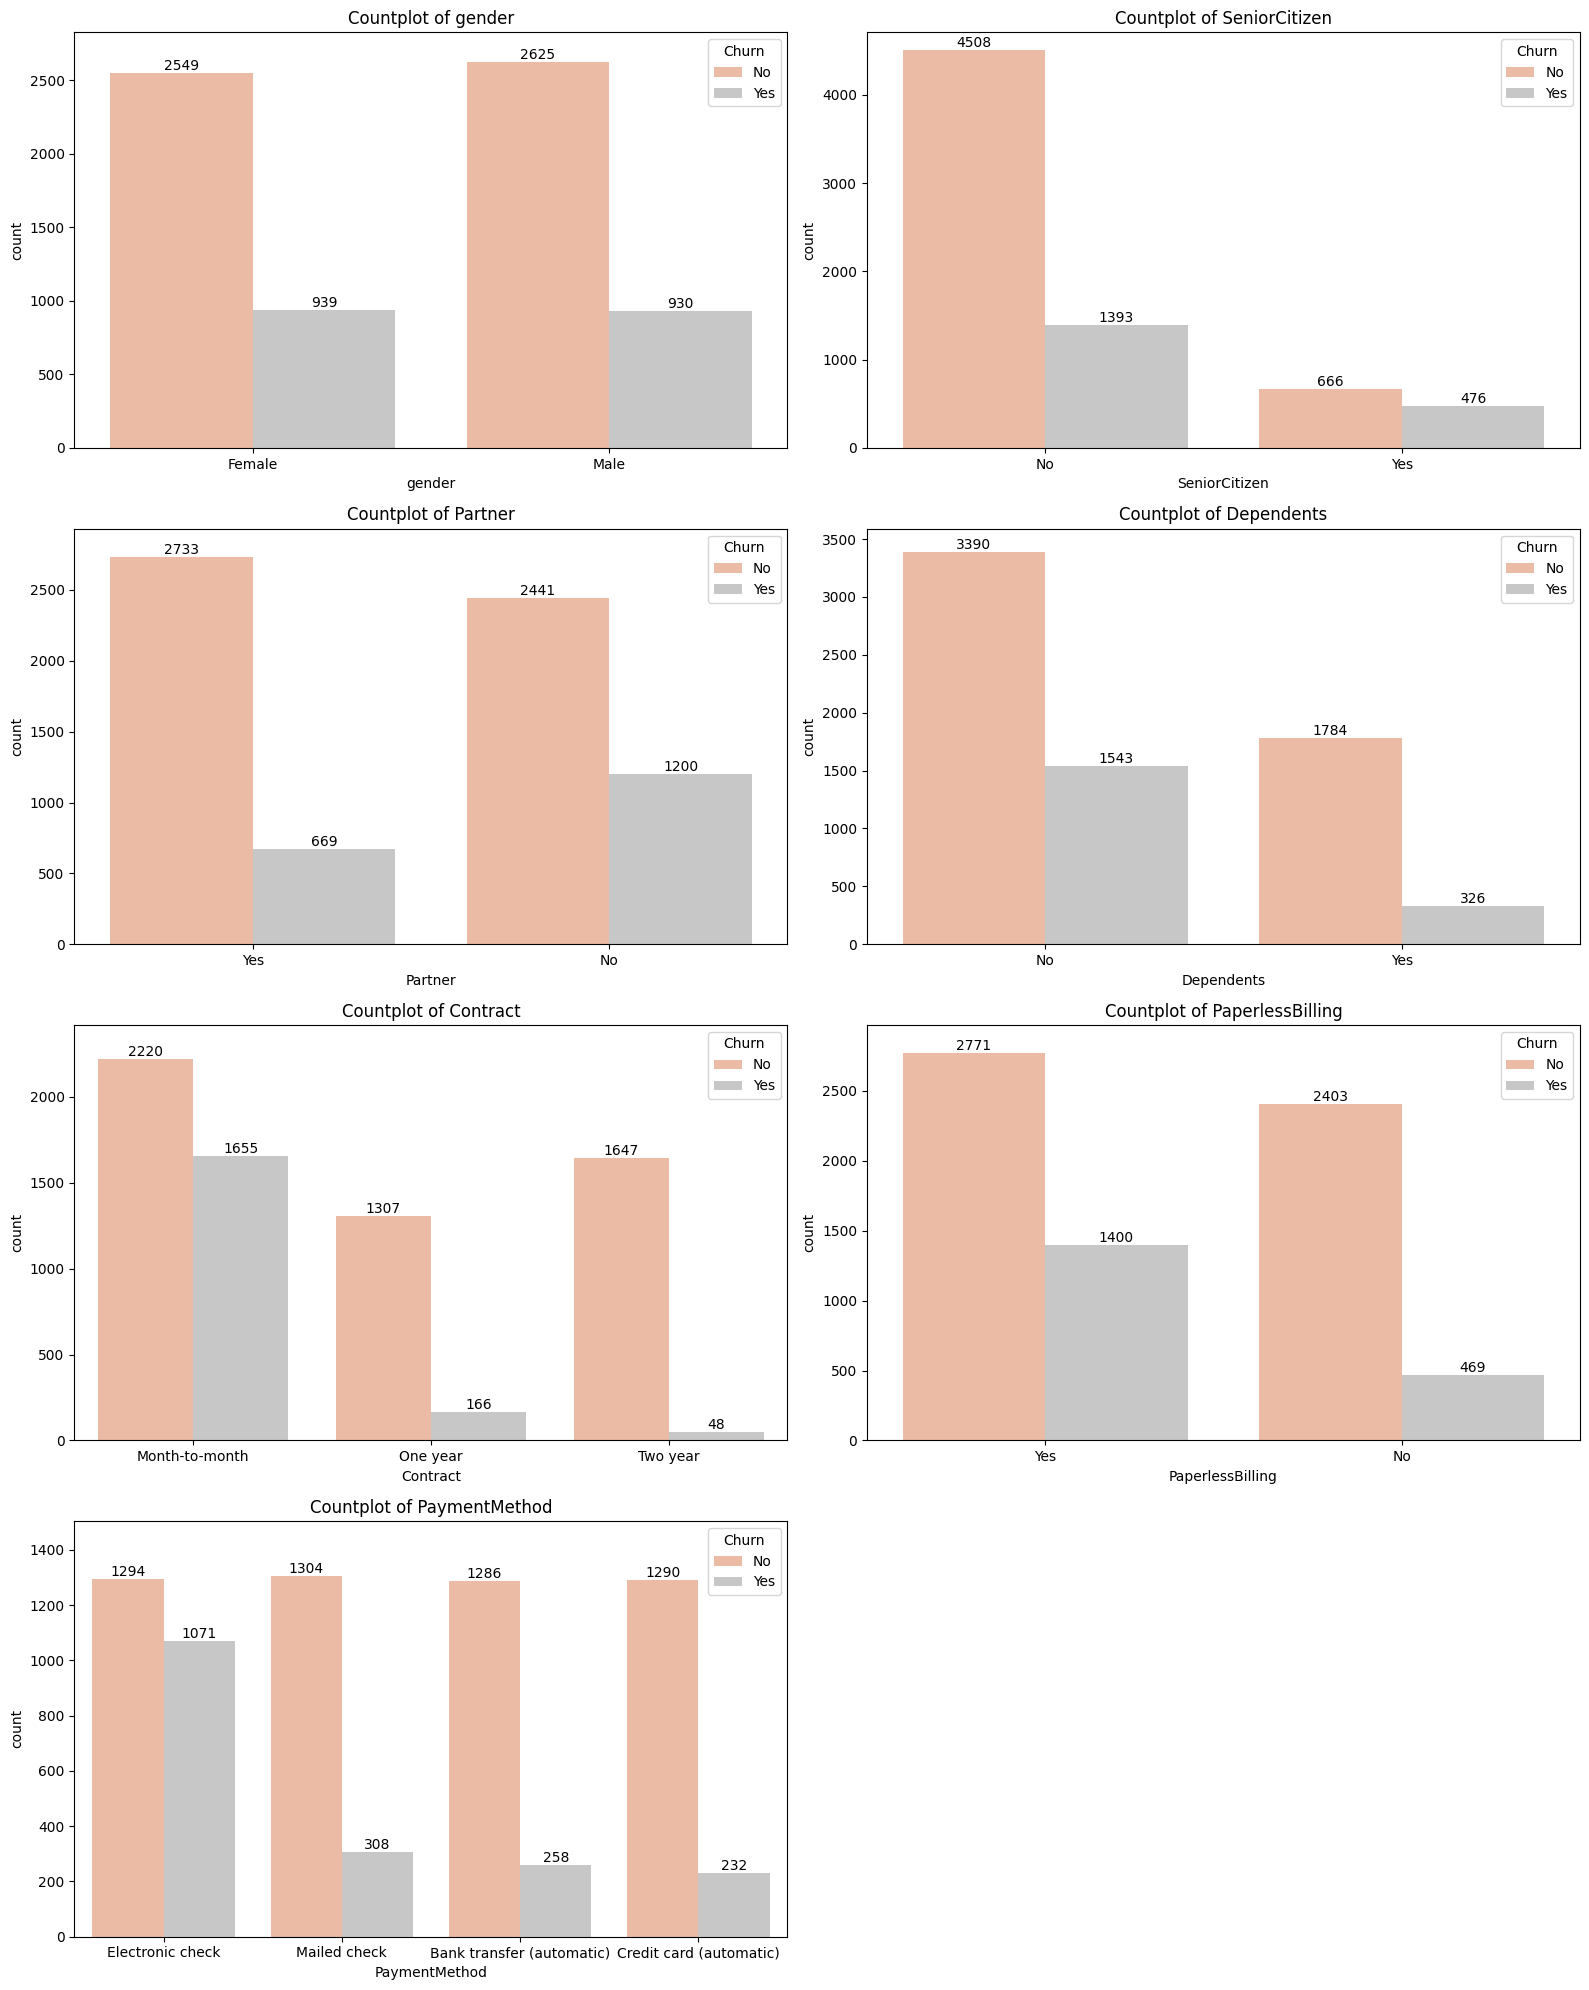

In [13]:
# Visualization of Independent Categorical Variables with the Target variable.
x_independent_cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Dynamically calculate the number of rows and columns based on the length of x_vars
n_plots = len(x_independent_cat_vars)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

# Create subplots dynamically based on the number of variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), sharey=False)

# Flatten axes array to make indexing easier in case of multiple rows
axes = axes.flatten()

# Iterate through each x-variable and plot
for i, x_var in enumerate(x_independent_cat_vars):
    ax = axes[i]
    sns.countplot(x=x_var, hue='Churn', data=df, ax=ax, palette='RdGy')
    ax.set_title(f'Countplot of {x_var}')
    
    # Add counts on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

    # Set specific y-axis limit for better visualization
    max_height = max([bar.get_height() for bar in ax.patches])  # Get max count
    ax.set_ylim(0, max_height + 200)  # Add a margin for clarity

# Remove empty subplots if any
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
x_independent_cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate churn rates of x_independent_cat_vars
for var in x_independent_cat_vars:
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate['Churn Rate (%)'] = churn_rate['Yes'] * 100
    styled_table = churn_rate.style.format({'Churn Rate (%)': '{:.2f}%'}).background_gradient(cmap='RdYlGn_r', subset=['Churn Rate (%)'])
    print(f"\nChurn rates for {var}:\n")
    display(styled_table)


Churn rates for gender:



Churn,No,Yes,Churn Rate (%)
gender,,,
Female,0.730791,0.269209,26.92%
Male,0.738397,0.261603,26.16%



Churn rates for SeniorCitizen:



Churn,No,Yes,Churn Rate (%)
SeniorCitizen,,,
No,0.763938,0.236062,23.61%
Yes,0.583187,0.416813,41.68%



Churn rates for Partner:



Churn,No,Yes,Churn Rate (%)
Partner,,,
No,0.670420,0.329580,32.96%
Yes,0.803351,0.196649,19.66%



Churn rates for Dependents:



Churn,No,Yes,Churn Rate (%)
Dependents,,,
No,0.687209,0.312791,31.28%
Yes,0.845498,0.154502,15.45%



Churn rates for Contract:



Churn,No,Yes,Churn Rate (%)
Contract,,,
Month-to-month,0.572903,0.427097,42.71%
One year,0.887305,0.112695,11.27%
Two year,0.971681,0.028319,2.83%



Churn rates for PaperlessBilling:



Churn,No,Yes,Churn Rate (%)
PaperlessBilling,,,
No,0.836699,0.163301,16.33%
Yes,0.664349,0.335651,33.57%



Churn rates for PaymentMethod:



Churn,No,Yes,Churn Rate (%)
PaymentMethod,,,
Bank transfer (automatic),0.832902,0.167098,16.71%
Credit card (automatic),0.847569,0.152431,15.24%
Electronic check,0.547146,0.452854,45.29%
Mailed check,0.808933,0.191067,19.11%


> **Note:**
> - ***In Gender** the **Churn Rates of both Male and Female are Identical (26%)**, this indeed indicates that Gender has **No Discriminatory Power** in **predicting Churn**, So **Don't need to include Gender into the model**.*
> - *Churn Rate for SeniorCitizen is 41.68%, and the Churn Rate for Non-SeniorCitizen is 23.61%, So **SeniorCitizen are 18.07% more likely to Churn compared to Non-SeniorCitizens**.*
> - *Churn Rate of customers who's Having Partner is 19.66%, and who's Having No Partner is 32.96%, So **Not Having Partner is 13.30% more likely to Churn compared to Having Partner**.*
> - *Churn Rate of customers who's Having Dependants is 15.45%, and who's Having No Dependants is 31.28%, So **Not Having Dependants is 15.83% more likely to Churn compared to Having Dependants**.*
> - *In Contract the Churn Rates of Month-to-month is 42.71%, One year is 11.27% and Two year is 2.83%, this indeed indicates that customers having **Month-to-month contract is more likely to Churn compared to customers having One and Two year contract**.*
> - *Churn Rate of customers who's Having PaperlessBilling is 33.57%, and who's Having No PaperlessBilling is 16.33%, So **Having PaperlessBilling is 17.24% more likely to Churn compared to Not Having PaperlessBilling**.*
> - ***In PaymentMethod** the **Churn Rates of Electronic check is 45.29%, Mailed check	 is 19.11%, Credit card 15.24% and Bank transfer is 16.71%**, this indeed indicates that customers having **Electronic check is more likely to Churn** and the **Rest have approximately 16% similar Churn rates**, so **Grouping them into one rather than adding more complexity to the model**.*

In [15]:
# Droping Gender Feature
df = df.drop(columns=['gender'], errors='ignore')

# Define the mapping for Payment method
payment_method_mapping = {'Electronic check': 'Electronic', 'Mailed check': 'Other', 'Bank transfer (automatic)': 'Other', 'Credit card (automatic)': 'Other'}
# Apply the mapping to PaymentMethod Column
df['PaymentMethod'] = df['PaymentMethod'].map(payment_method_mapping)

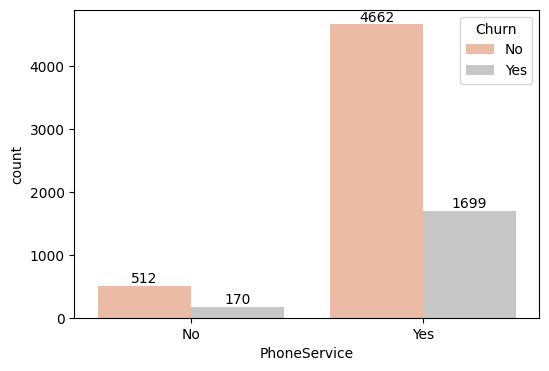

In [16]:
# Visualization of PhoneService Categorical Variables with the Target variable.
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='PhoneService', hue='Churn', data=df, palette='RdGy')

# Counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

In [17]:
# Calculate churn rates of PhoneService
churn_rate = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate['Churn Rate (%)'] = churn_rate['Yes'] * 100
styled_table = churn_rate.style.format({'Churn Rate (%)': '{:.2f}%'}).background_gradient(cmap='RdYlGn_r', subset=['Churn Rate (%)'])
print(f"\nChurn rates for {'PhoneService'}:\n")
display(styled_table)


Churn rates for PhoneService:



Churn,No,Yes,Churn Rate (%)
PhoneService,,,
No,0.750733,0.249267,24.93%
Yes,0.732904,0.267096,26.71%


> ***Note:** **Churn Rate** of both the customers who's **Having PhoneService and Not Having PhoneService is Identical**, this indeed indicates that PhoneService has **No Discriminatory Power** in **predicting Churn**, So **Don't need to include PhoneService into the model**.*

In [18]:
# Droping PhoneService Feature
df = df.drop(columns=['PhoneService'], errors='ignore')

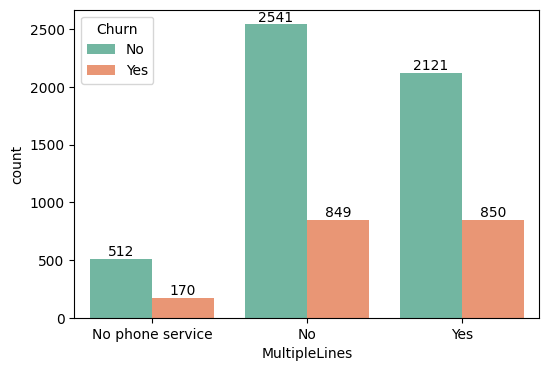

In [19]:
# Visualization of MultipleLines Categorical Variables with the Target variable.
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='MultipleLines', hue='Churn', data=df, palette='Set2')

# Counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

In [20]:
# Calculate churn rates of PhoneService
churn_rate = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate['Churn Rate (%)'] = churn_rate['Yes'] * 100
styled_table = churn_rate.style.format({'Churn Rate (%)': '{:.2f}%'}).background_gradient(cmap='RdYlGn_r', subset=['Churn Rate (%)'])
print(f"\nChurn rates for {'MultipleLines'}:\n")
display(styled_table)


Churn rates for MultipleLines:



Churn,No,Yes,Churn Rate (%)
MultipleLines,,,
No,0.749558,0.250442,25.04%
No phone service,0.750733,0.249267,24.93%
Yes,0.713901,0.286099,28.61%


> **Note:**
> - ***PhoneService and MultipleLines can lead to multicollinearity.** because the category **MultipleLines = NoPhoneService directly depends on PhoneService = No, making the two features highly correlated**.*
> - ***Since we Remove PhoneService**, we should also **Remove NoPhoneService category from MultipleLines** because **Without the context of PhoneService, NoPhoneService cannot provide any additional information**. If a feature category (e.g., NoPhoneService) is completely dependent on another feature (e.g., PhoneService) that has no discriminatory power, it also lacks discriminatory power. Keeping such a dependent category would just reintroduce the same redundancy and irrelevance that you tried to remove by excluding the parent feature.*
> - ***Notice that Yes and No in MultipleLines are also approximately identical (3.57% is the difference)**, this indeed indicates **No Discriminatory Power in predicting Churn** with Yes and No, So **Don't need to include MultipleLines also into the model**.*

In [21]:
# Droping MultipleLines Feature
df = df.drop(columns=['MultipleLines'], errors='ignore')

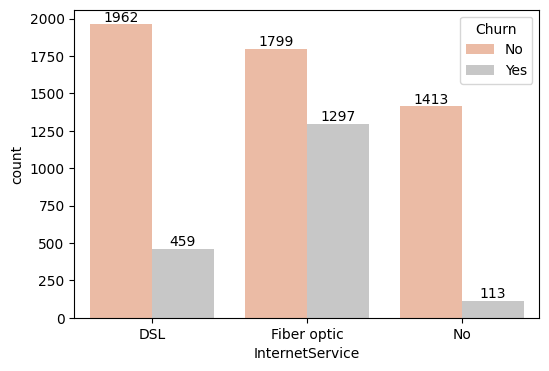

In [22]:
# Visualization of InternetService Categorical Variables with the Target variable.
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='InternetService', hue='Churn', data=df, palette='RdGy')

# Counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

In [23]:
# Calculate churn rates of PhoneService
churn_rate = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate['Churn Rate (%)'] = churn_rate['Yes'] * 100
styled_table = churn_rate.style.format({'Churn Rate (%)': '{:.2f}%'}).background_gradient(cmap='RdYlGn_r', subset=['Churn Rate (%)'])
print(f"\nChurn rates for {'InternetService'}:\n")
display(styled_table)


Churn rates for InternetService:



Churn,No,Yes,Churn Rate (%)
InternetService,,,
DSL,0.810409,0.189591,18.96%
Fiber optic,0.581072,0.418928,41.89%
No,0.925950,0.074050,7.40%


> ***Note:** **Churn Rate** of customers who's **Having Fiber optic	is 41.89%, DSL is 18.96% and NoInternetService is 7.40%**, So **Customers who's having Fiber optic is 22.93% more likely to Churn compared to those Having DSL**. And **Customers who's having NoInternetService is less likely to churn**.*

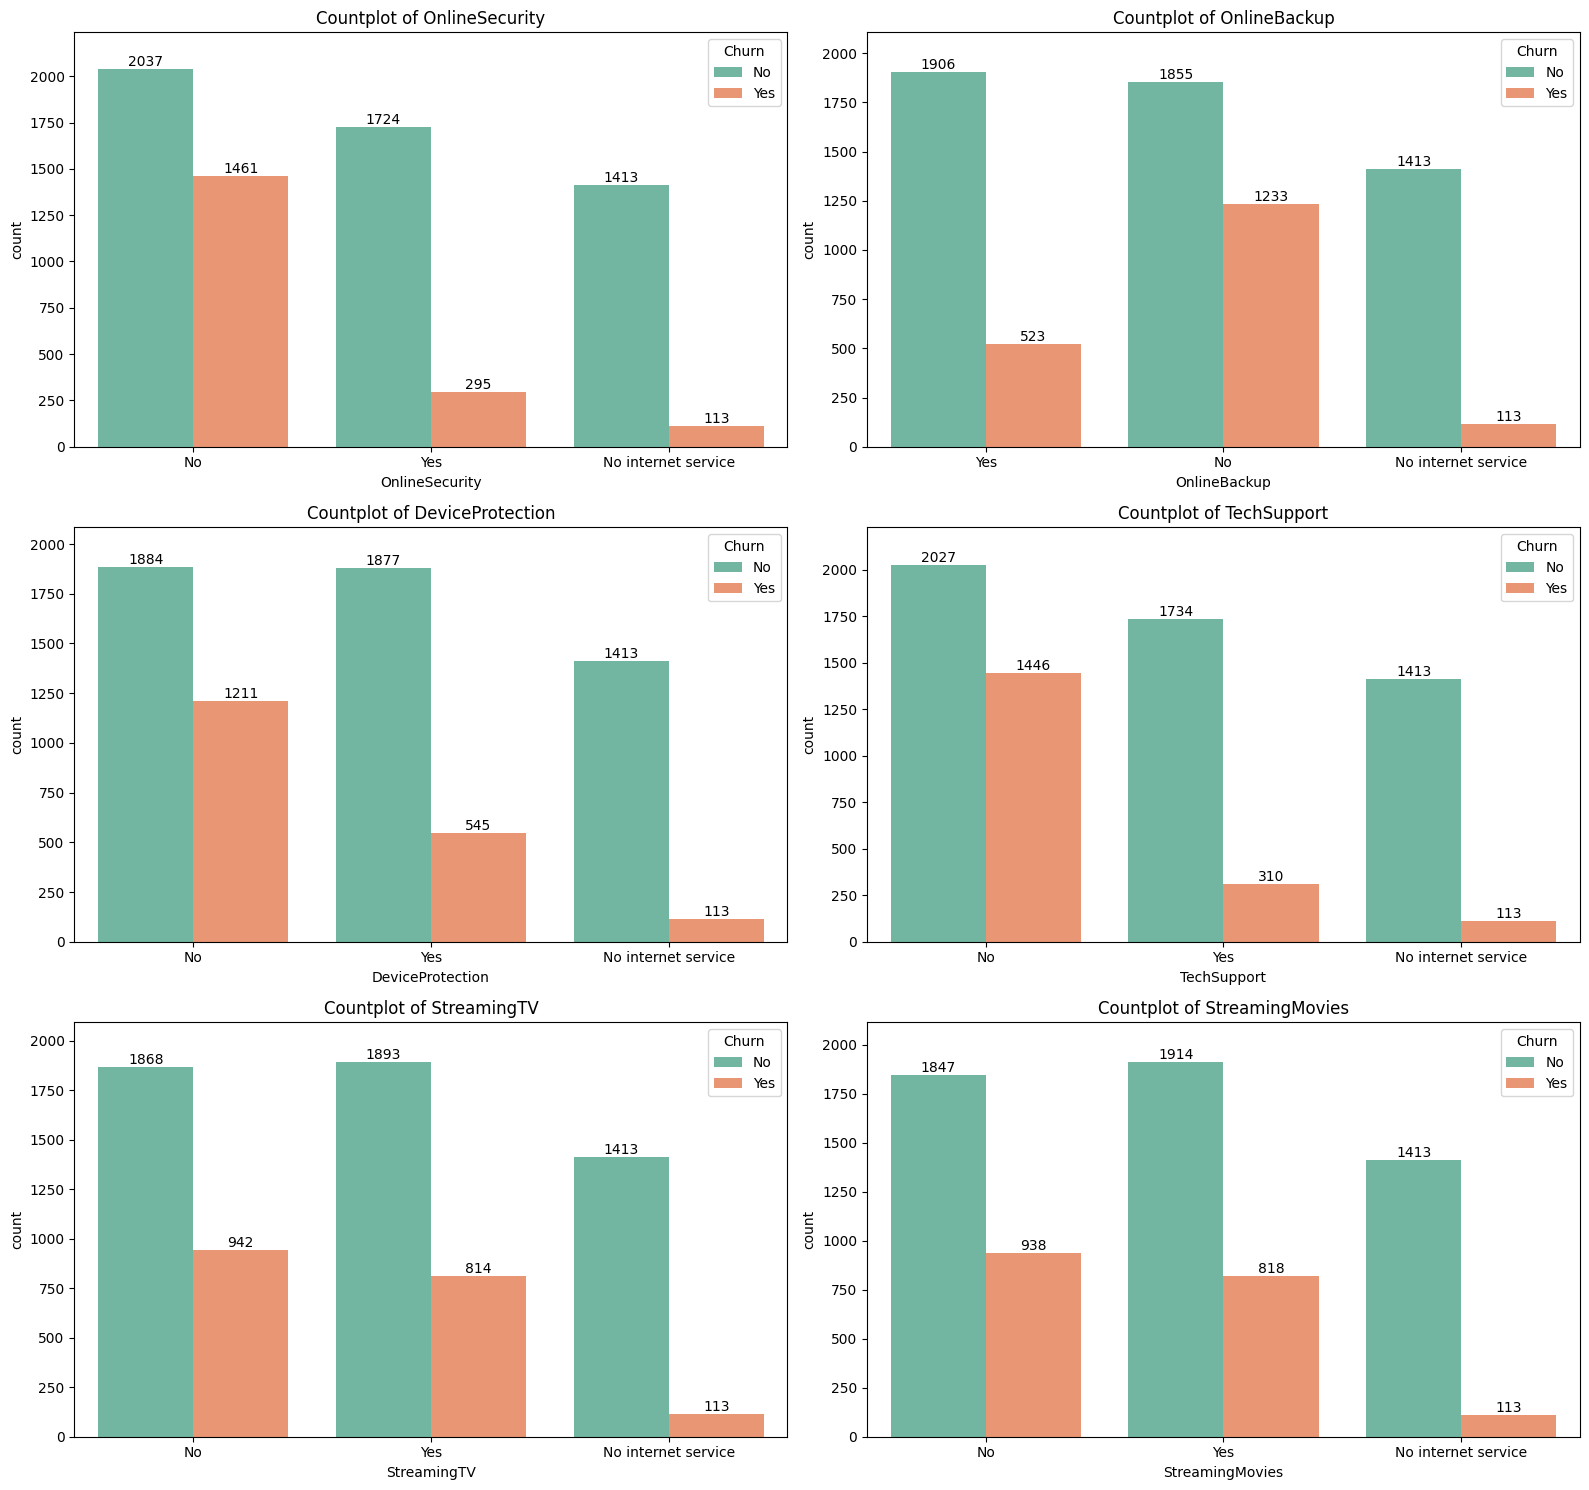

In [24]:
# Visualization of Independent Internet Related Categorical Variables with the Target variable.
x_independent_internet_related_cat_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Dynamically calculate the number of rows and columns based on the length of x_vars
n_plots = len(x_independent_internet_related_cat_vars)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

# Create subplots dynamically based on the number of variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), sharey=False)

# Flatten axes array to make indexing easier in case of multiple rows
axes = axes.flatten()

# Iterate through each x-variable and plot
for i, x_var in enumerate(x_independent_internet_related_cat_vars):
    ax = axes[i]
    sns.countplot(x=x_var, hue='Churn', data=df, ax=ax, palette='Set2')
    ax.set_title(f'Countplot of {x_var}')
    
    # Add counts on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

    # Set specific y-axis limit for better visualization
    max_height = max([bar.get_height() for bar in ax.patches])  # Get max count
    ax.set_ylim(0, max_height + 200)  # Add a margin for clarity

# Remove empty subplots if any
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> **Note:**
> - ***InternetService and 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' can lead to multicollinearity.** because **Others = NoInternetService directly depends on InternetService = No, making these highly correlated with InternetService**. NoInternetService directly depends on InternetService = No. This creates redundancy, the information in NoInternetService is already encoded by InternetService.*
> - *We can **Reduce Multicollinearity (but not entirely eliminates it)** by **Combining NoInternetService with No**.*

In [25]:
# Define the mapping and columns to transform
no_internet_service_mapping = {'Yes': 'Yes', 'No': 'No', 'No internet service': 'No'}
columns_to_map = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Apply the mapping to each column
df[columns_to_map] = df[columns_to_map].apply(lambda col: col.map(no_internet_service_mapping))

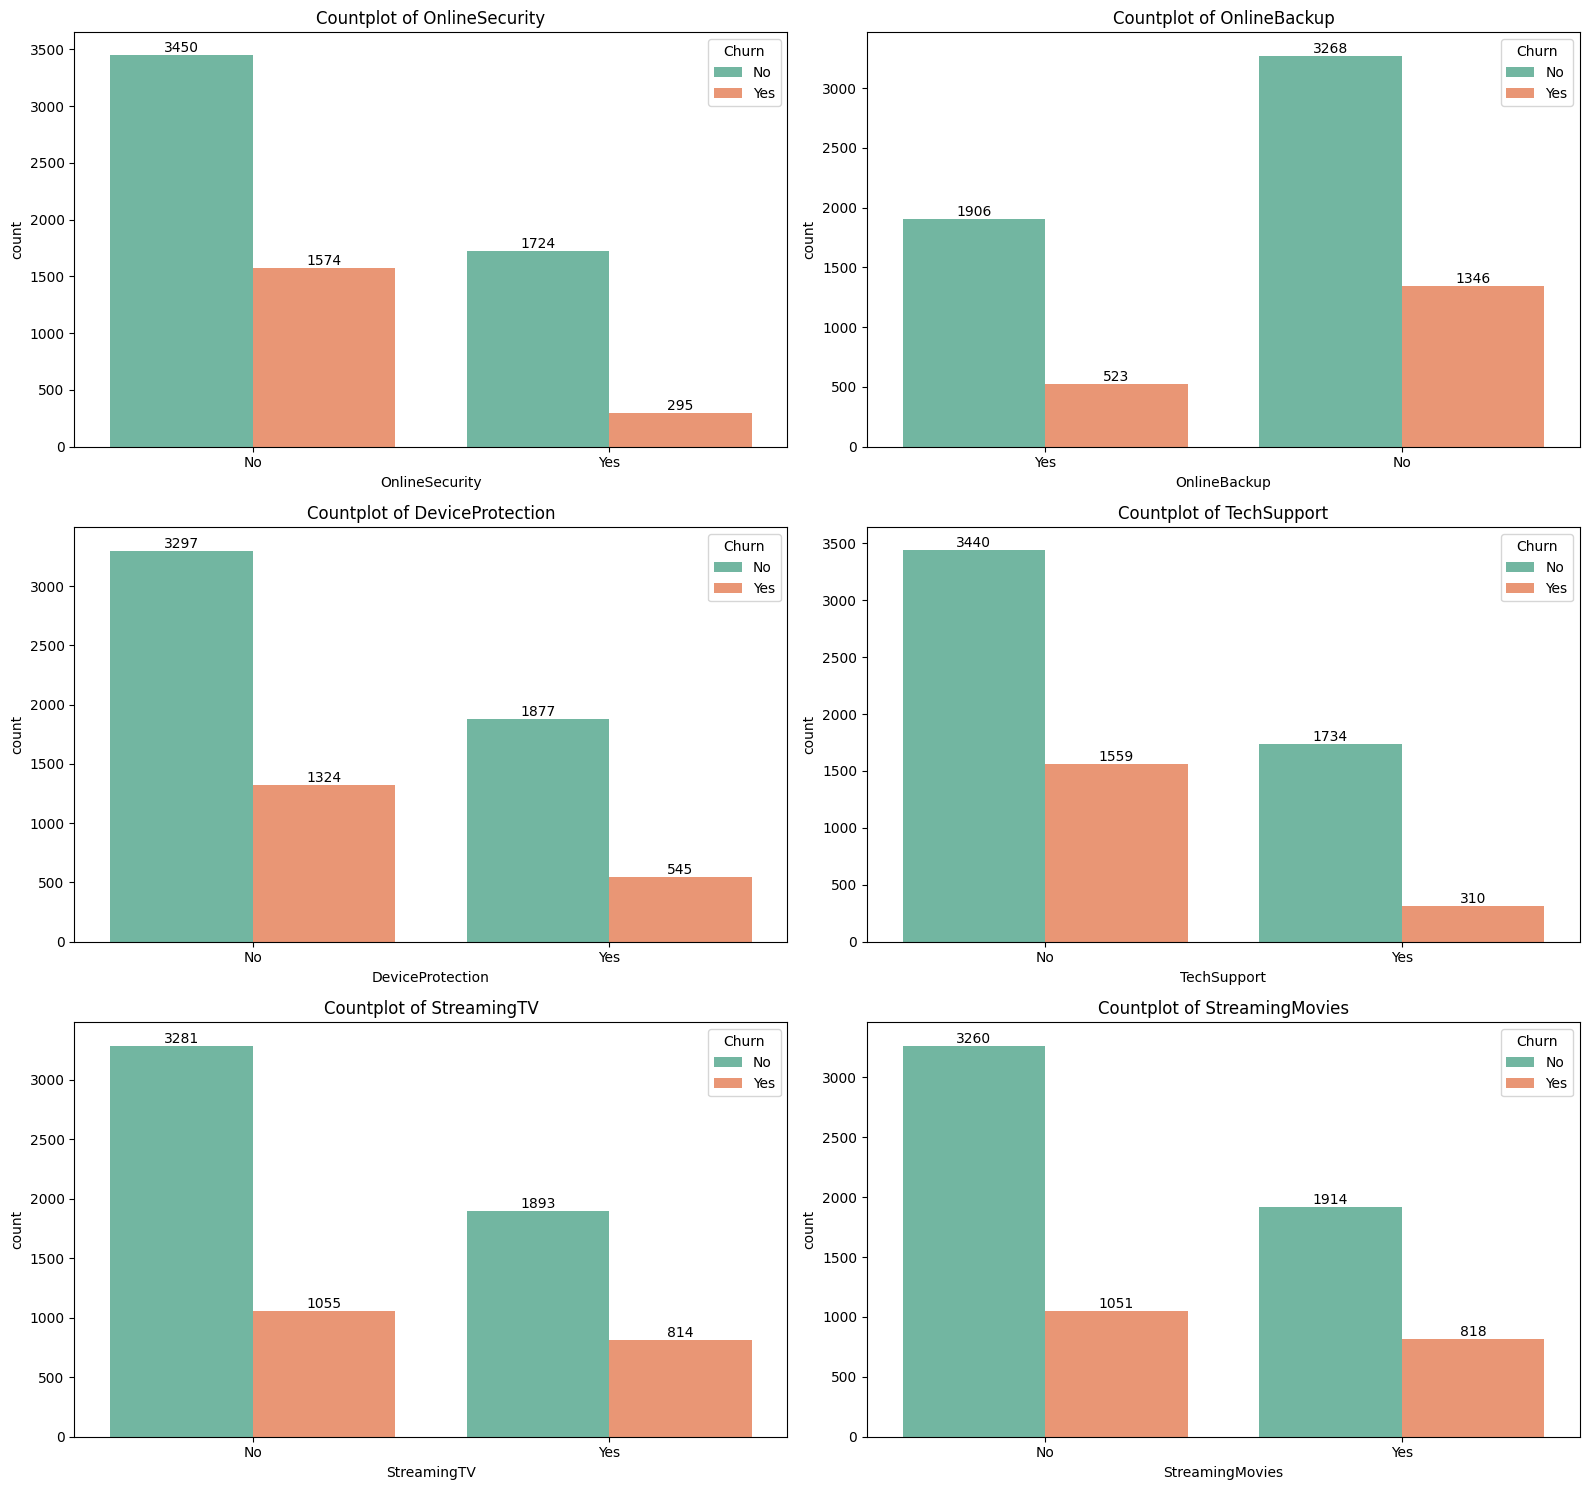

In [26]:
# Visualization of Independent Internet Related Categorical Variables with the Target variable.
x_independent_internet_related_cat_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Dynamically calculate the number of rows and columns based on the length of x_vars
n_plots = len(x_independent_internet_related_cat_vars)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

# Create subplots dynamically based on the number of variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), sharey=False)

# Flatten axes array to make indexing easier in case of multiple rows
axes = axes.flatten()

# Iterate through each x-variable and plot
for i, x_var in enumerate(x_independent_internet_related_cat_vars):
    ax = axes[i]
    sns.countplot(x=x_var, hue='Churn', data=df, ax=ax, palette='Set2')
    ax.set_title(f'Countplot of {x_var}')
    
    # Add counts on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

    # Set specific y-axis limit for better visualization
    max_height = max([bar.get_height() for bar in ax.patches])  # Get max count
    ax.set_ylim(0, max_height + 200)  # Add a margin for clarity

# Remove empty subplots if any
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
x_independent_internet_related_cat_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculate churn rates of x_independent_cat_vars
for var in x_independent_internet_related_cat_vars:
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate['Churn Rate (%)'] = churn_rate['Yes'] * 100
    styled_table = churn_rate.style.format({'Churn Rate (%)': '{:.2f}%'}).background_gradient(cmap='RdYlGn_r', subset=['Churn Rate (%)'])
    print(f"\nChurn rates for {var}:\n")
    display(styled_table)


Churn rates for OnlineSecurity:



Churn,No,Yes,Churn Rate (%)
OnlineSecurity,,,
No,0.686704,0.313296,31.33%
Yes,0.853888,0.146112,14.61%



Churn rates for OnlineBackup:



Churn,No,Yes,Churn Rate (%)
OnlineBackup,,,
No,0.708279,0.291721,29.17%
Yes,0.784685,0.215315,21.53%



Churn rates for DeviceProtection:



Churn,No,Yes,Churn Rate (%)
DeviceProtection,,,
No,0.713482,0.286518,28.65%
Yes,0.774979,0.225021,22.50%



Churn rates for TechSupport:



Churn,No,Yes,Churn Rate (%)
TechSupport,,,
No,0.688138,0.311862,31.19%
Yes,0.848337,0.151663,15.17%



Churn rates for StreamingTV:



Churn,No,Yes,Churn Rate (%)
StreamingTV,,,
No,0.756688,0.243312,24.33%
Yes,0.699298,0.300702,30.07%



Churn rates for StreamingMovies:



Churn,No,Yes,Churn Rate (%)
StreamingMovies,,,
No,0.756205,0.243795,24.38%
Yes,0.700586,0.299414,29.94%


> **Note:**
> - *Churn Rate of customers who's Having OnlineSecurity is 14.61%, and who's Having No OnlineSecurity is 31.33%, So **Not Having OnlineSecurity is 16.72% more likely to Churn compared to Having OnlineSecurity**.*
> - *Churn Rate of customers who's Having OnlineBackup is 21.53%, and who's Having No OnlineBackup is 29.17%, So **Not Having OnlineBackup is 7.64% more likely to Churn compared to Having OnlineBackup**.*
> - *Churn Rate of customers who's Having DeviceProtection is 22.50%, and who's Having No DeviceProtection is 28.65%, So **Not Having DeviceProtection is 6.15% more likely to Churn compared to Having DeviceProtection**.*
> - *Churn Rate of customers who's Having TechSupport is 15.17%, and who's Having No TechSupport is 31.19%, So **Not Having TechSupport is 14.02% more likely to Churn compared to Having TechSupport**.*
> - *Churn Rate of customers who's StreamingTV is 30.07%, and who's Not StreamingTV is 24.33% So **StreamingTV is 5.74% more likely to Churn compared to Not StreamingTV**.*
> - *Churn Rate of customers who's StreamingMovies is 29.94%, and who's Not StreamingMovies is 24.38% So **StreamingMovies is 5.56% more likely to Churn compared to Not StreamingMovies**.*

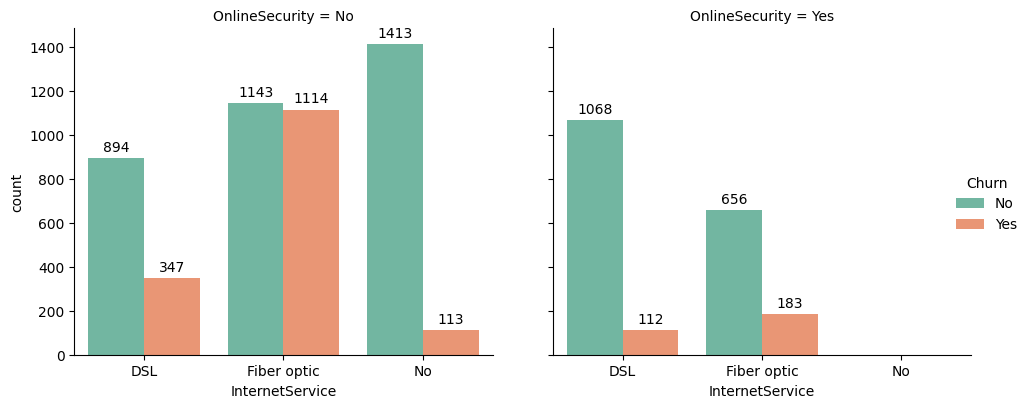

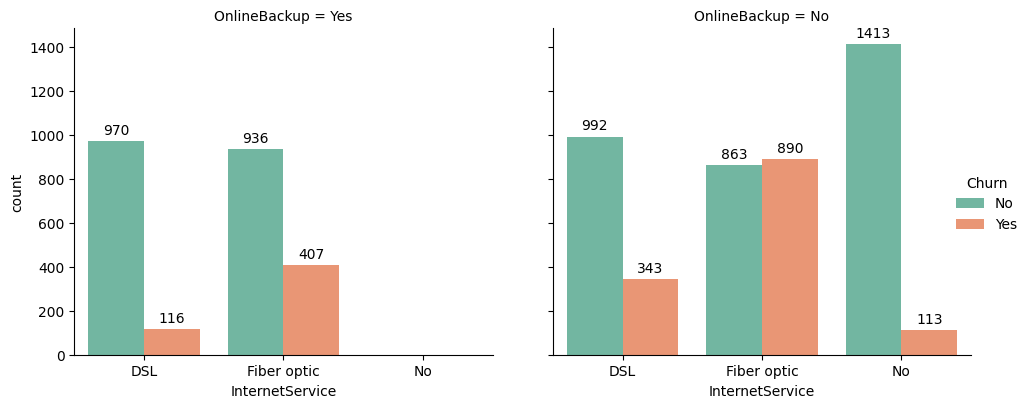

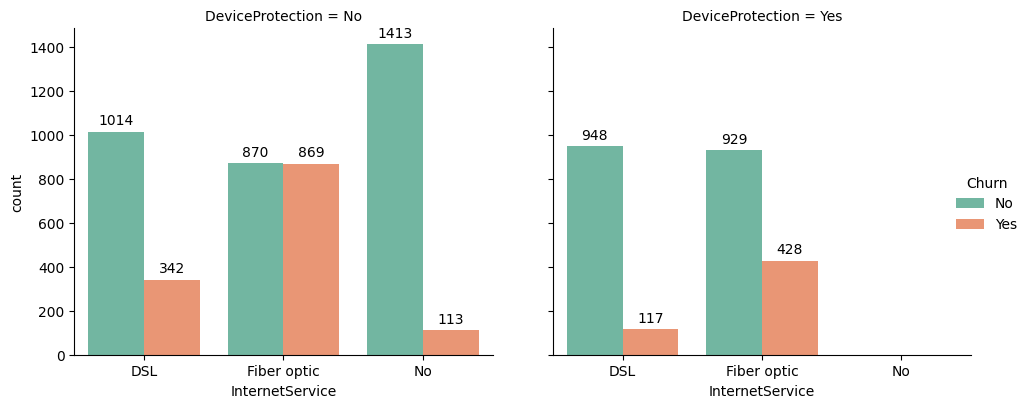

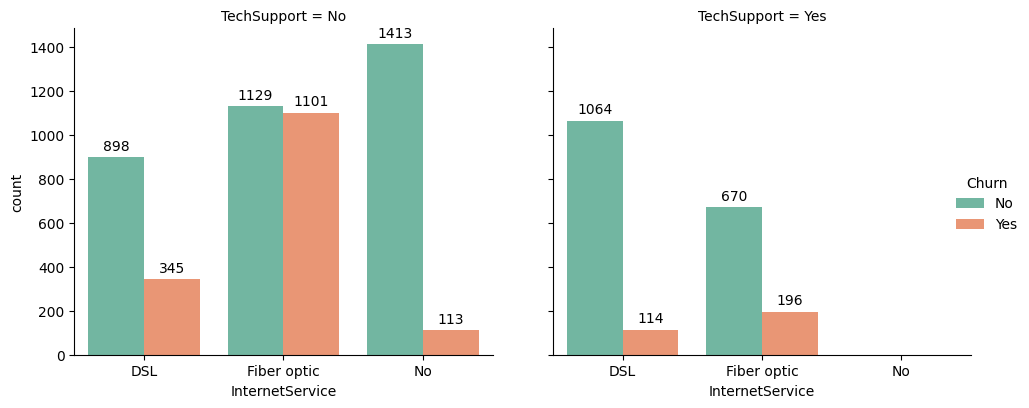

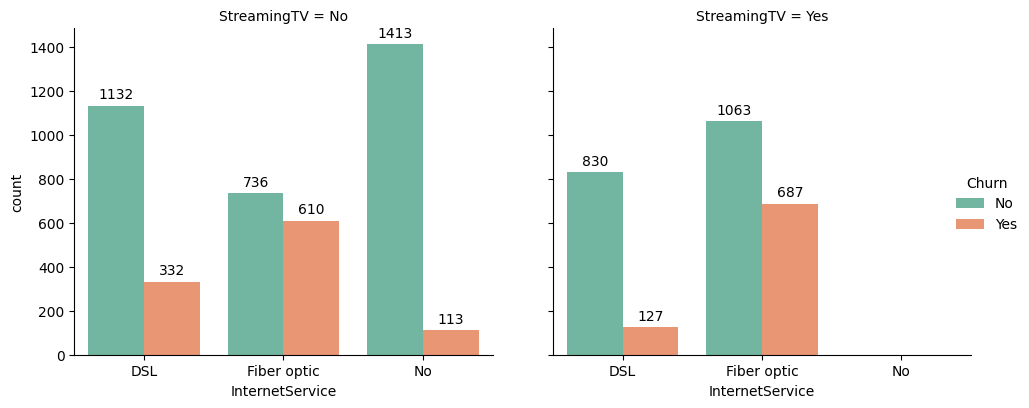

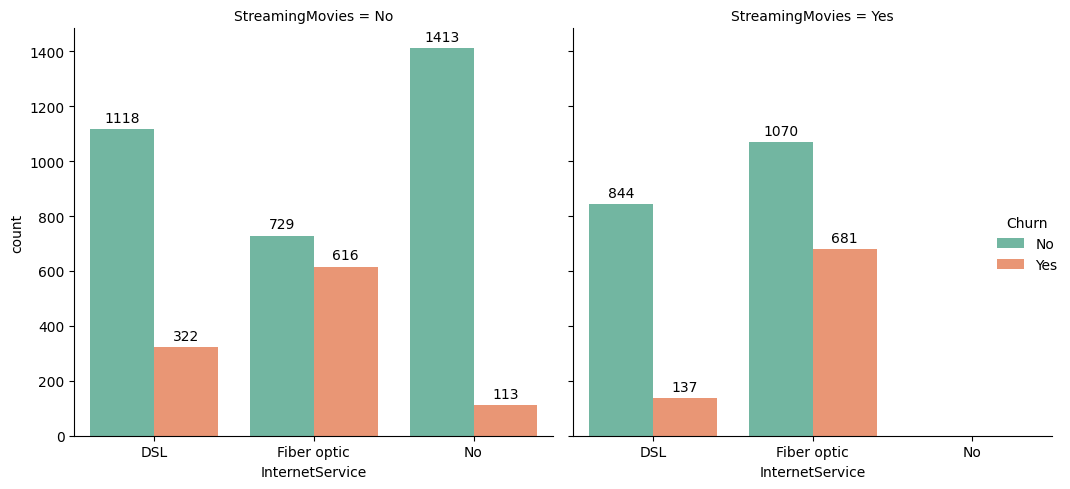

In [28]:
# Visualization of Independent Internet Related Categorical Variables with the Target variable.
x_independent_internet_related_cat_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for x_var in x_independent_internet_related_cat_vars:
    g = sns.catplot(x='InternetService', col=x_var, hue='Churn', data=df, kind='count', palette='Set2')
    
    # Iterate through each subplot (axis) and add count labels on the bars
    for ax in g.axes.flat:  # g.axes.flat allows iteration over all axes
        # Iterate over the bars (patches) and annotate the count on top of each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)  # Annotating counts

    # Adjust the layout for better spacing between subplots
    g.fig.tight_layout(pad=4.0)

plt.tight_layout()
plt.show()

#### **Quantitative Variable Visualization**

In [29]:
# Viewing the Description of Quantitative Variables
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


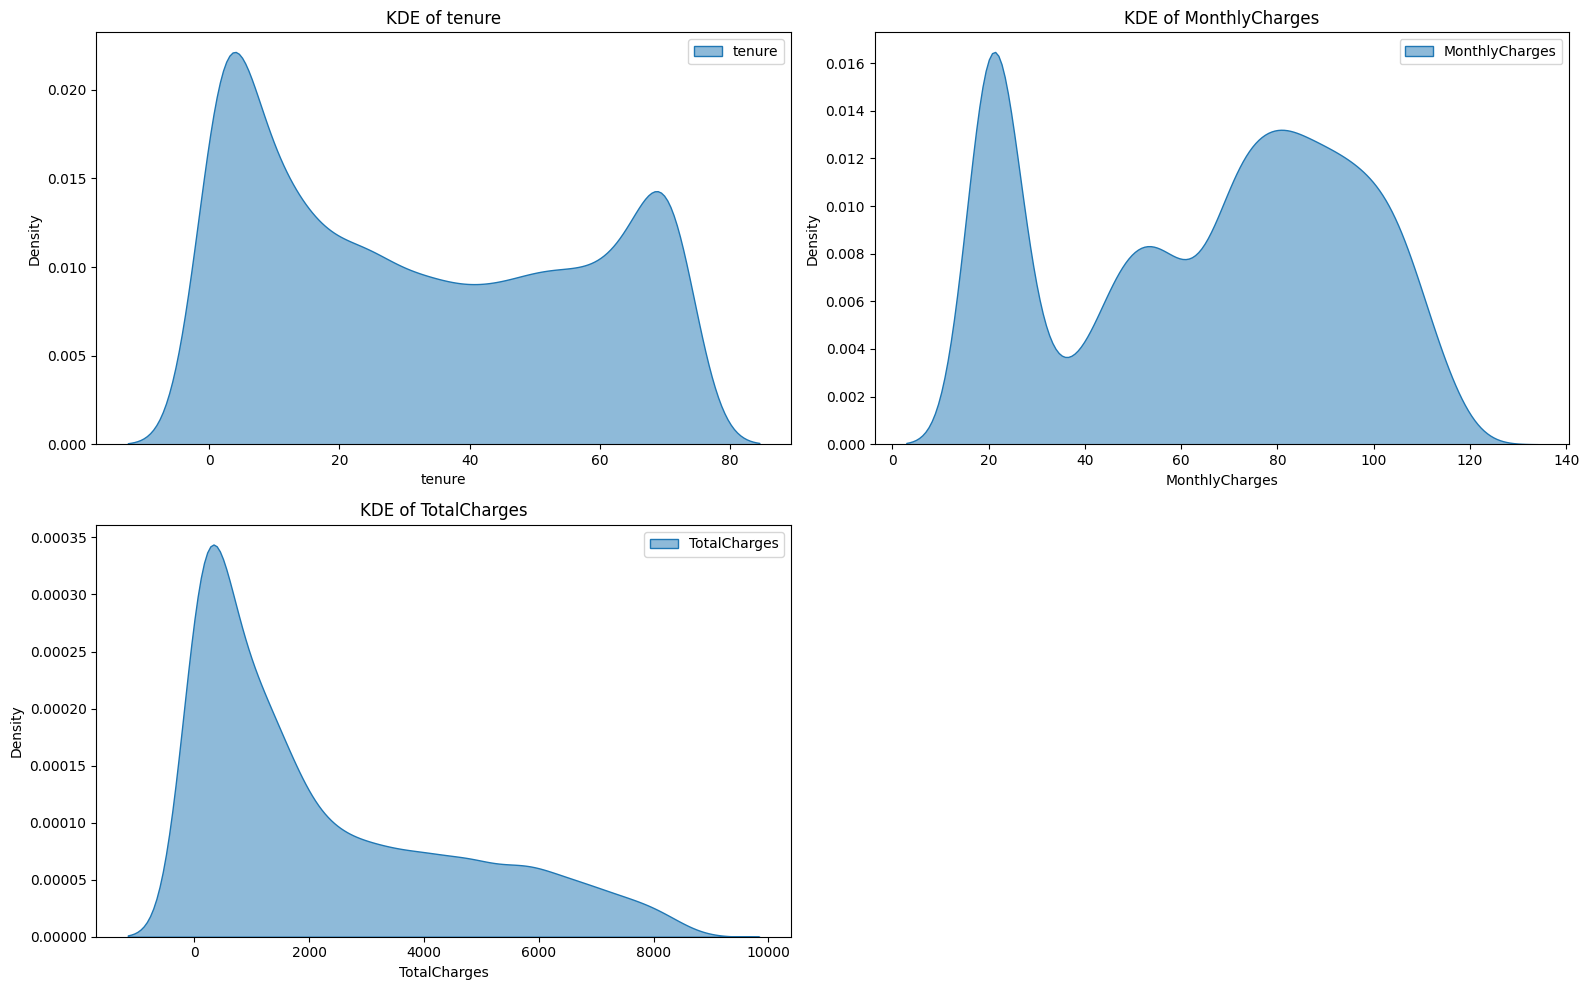

In [30]:
# Visualization of Independent Quantitative Variable.
x_quantitative_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Dynamically calculate the number of rows and columns based on the length of x_vars
n_plots = len(x_quantitative_var)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate number of rows

# Create subplots dynamically based on the number of variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), sharey=False)

# Flatten axes array to make indexing easier in case of multiple rows
axes = axes.flatten()

# Iterate through each x-variable and plot
for i, x_var in enumerate(x_quantitative_var):
    ax = axes[i]
    sns.kdeplot(df[x_var], fill=True, label=x_var, alpha=0.5, ax=ax)
    ax.set_title(f'KDE of {x_var}')
    ax.legend()

# Remove empty subplots if any
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display plot
plt.tight_layout()
plt.show()

> **Note:**
> - ***Customers with lower Tenure posses higher Density**.*
> - ***Customers with lower MonthlyCharges which indeed corresponds to Lower TotalCharges posses higher Density**.*

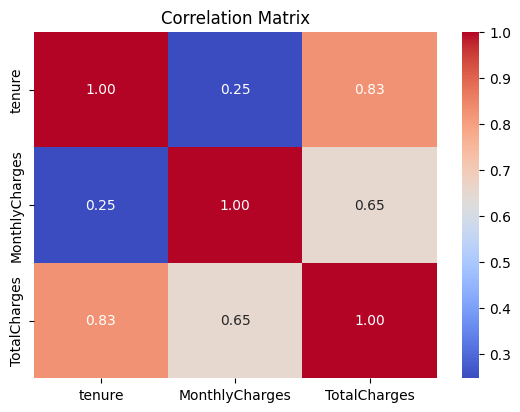

In [31]:
# Generate the correlation matrix for Continious Variables
correlation_matrix = df[['tenure','MonthlyCharges','TotalCharges']].corr()

# Plot the correlation matrix
plt.figure(figsize=(6.5, 4.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

> ****Note:*** The **Heatmap of the CorrelationMatrix** shows a **Strong Positive Correlation between Tenure and TotalCharges**, which is **0.83** and also a **Moderate Strong Positive Correlation between MonthlyCharges and TotalCharges**, which is **0.65**. Which is obvious if tenure is more the TotalCharge the customer paid will be higher and if monthly charge is high the Total charge will also be higher. This indeed **leads to Multicollinearity.***

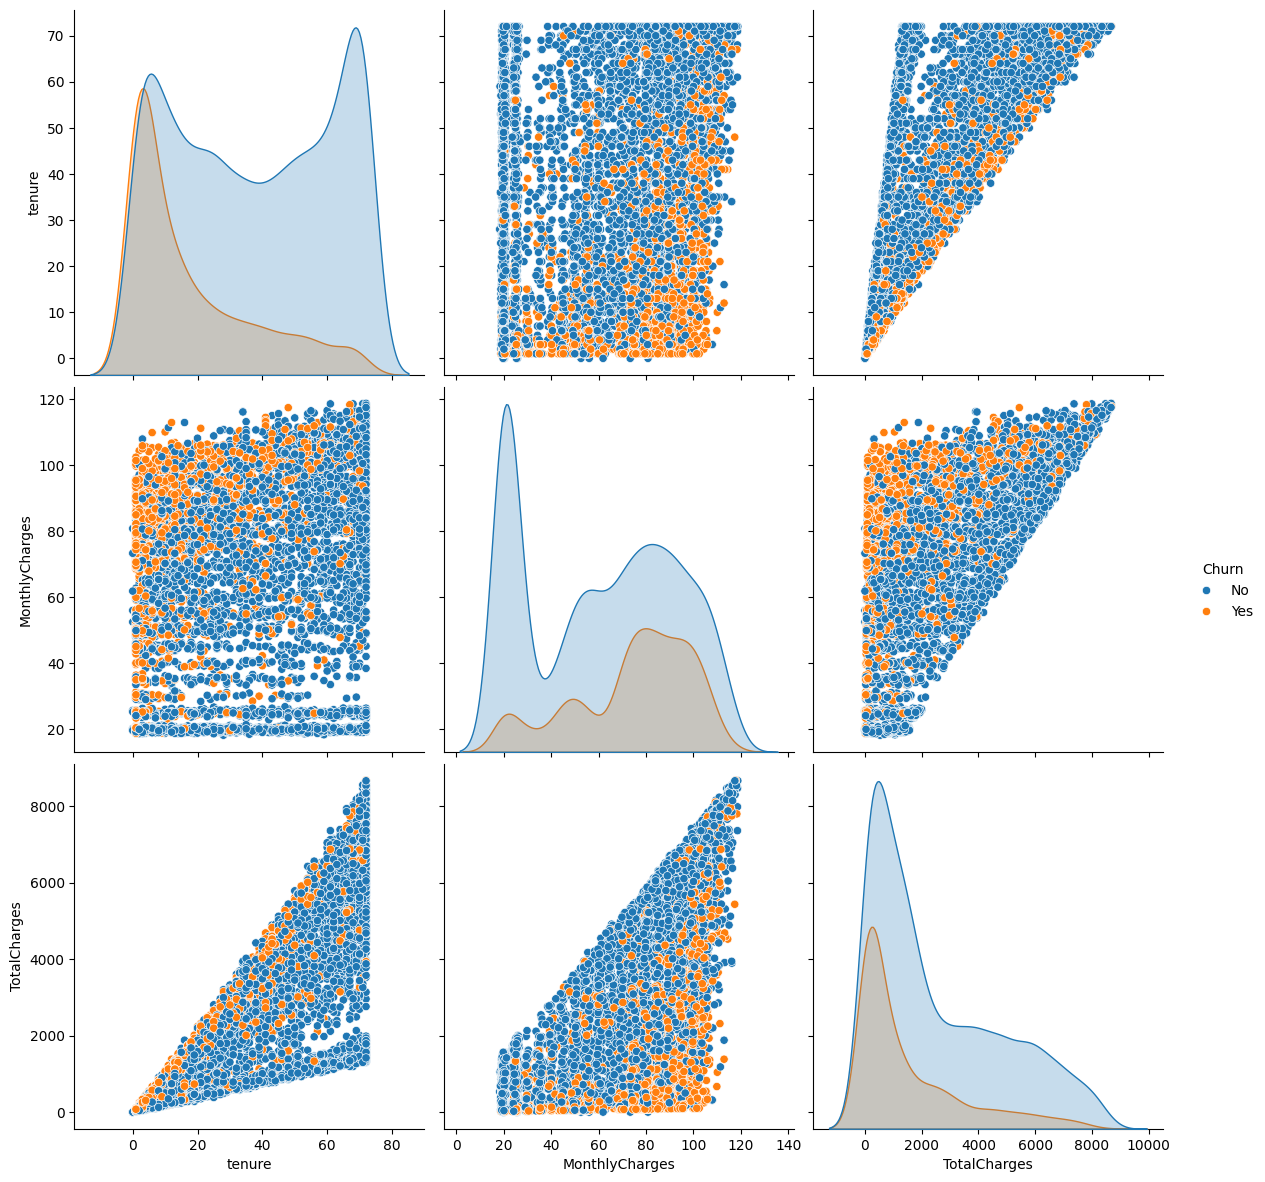

In [32]:
# Generate a pair plot with density overlays
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], height=4, diag_kind='kde', hue='Churn')

> ****Note:*** The above **Scatter Plots** **visually verifies** our **concluding regarding Multicollinearity problem addressed by Heatmap of Correlation Matrix.***

> ****Note:*** **Since TotalCharges highly correlated with MonthlyCharges and Tenure, we will drop it**.*

In [33]:
# Droping TotalCharges Feature
df = df.drop(columns=['TotalCharges'], errors='ignore')

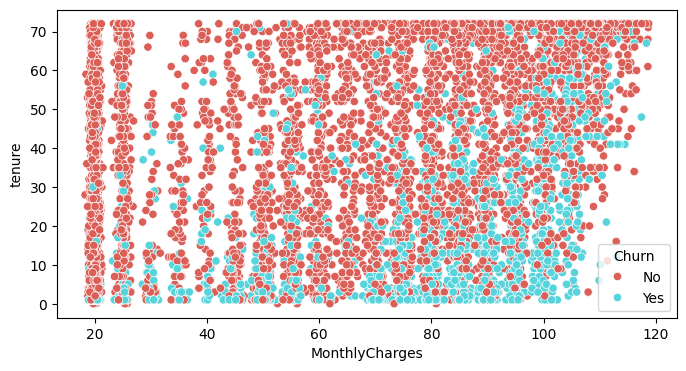

In [34]:
# Generating Scatterplot with Churn as hue to visualize any relations of Churn with Tenure and MonthlyCharges.
plt.figure(figsize=(8, 4))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df, palette='hls')
plt.show()

> ****Note:*** The **Likelihood** of customer **Staying Increases** as their **Tenure Increases** which incase **Irrespective of the MonthlyCharges**.*

> ****Note:*** The **Likelihood** of customer **Leaving Increases** as the **MonthlyCharges Increases** with **Lower Tenure**.*

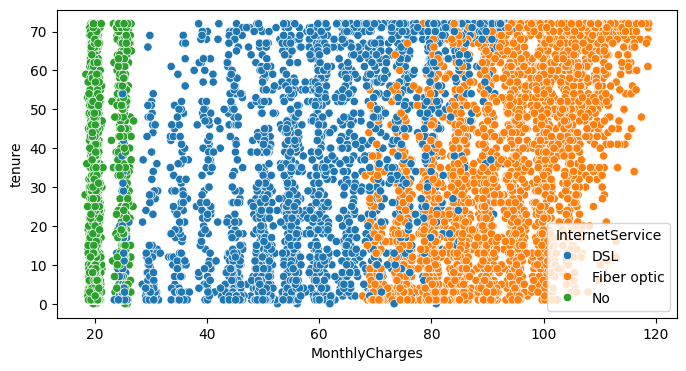

In [35]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='InternetService', data=df)
plt.show()

> ****Note:*** The Customers who have **NoInternetService (Only PhoneService)** are **Less Likely to Leave** because it **Causes Low MonthlyCharges**.*

> ****Note:*** The Customers who have **Fibre optics are more likely to Stay only if they have more than 60 Tenure**, Even **Customer Churn Rate** who have **Fibre optics with 20-60 Tenure is relatively High campared to customers who have DSL and NoInternetService within the same Tenure range**.*

### **Step 3: Data Encoding**

In [36]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Other,56.95,No
2,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Other,53.85,Yes
3,No,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Other,42.30,No
4,No,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic,70.70,Yes


> **Note:**
> - *For **Binary Categorical Variable** use **Label Encoding**, Represent **Yes as 1 and No as 0**.*
> - *For **InternetService (Fiber, DSL, No)** and for **Contract (Month-to-Month, One-Year, Two-Year)** Use **One-Hot Encoding**.*
> - *For **PaymentMethod** use **Lable Encoding** since it have only 2 values (can be treated as binary).*

In [37]:
# Create a LabelEncoder object
le = LabelEncoder()

# List of columns that need encoding (those with 'Yes' and 'No' values)
columns_to_lable_encode = ['PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Apply LabelEncoder to each column
for col in columns_to_lable_encode:
    df[col] = le.fit_transform(df[col])

In [38]:
# Columns to onehot encode
columns_to_onehot_encode = ['InternetService', 'Contract']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the selected columns
encoded_data = encoder.fit_transform(df[columns_to_onehot_encode])

# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_onehot_encode))

# Concatenate the encoded columns back to the original dataframe (optional)
df = df.join(encoded_df)
df = df.drop(columns=['InternetService', 'Contract'], errors='ignore')

In [39]:
# Viewing the Encoded Data
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,1,0,0,0,0,1,0,29.85,0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,0,1,0,0,0,0,1,56.95,0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,2,1,1,0,0,0,0,1,1,53.85,1,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,45,1,0,1,1,0,0,0,1,42.30,0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,2,0,0,0,0,0,0,1,0,70.70,1,0.0,1.0,0.0,1.0,0.0,0.0


### **Step 4: Model Building & Evaluation**

In [40]:
# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [41]:
# Split the data into train, validation, and test (stratified to maintain class proportions because it is imbalanced dataset problem)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [42]:
# Combine training and validation data for GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

#### **Decision Tree**

In [43]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criteria
    'max_depth': [None, 10, 20, 30, 40],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required in leaf
}

# Perform GridSearchCV
grid_cv = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid, 
    scoring='roc_auc',
    cv=5,
    verbose=1, 
    n_jobs=-1
)

# Training
grid_cv.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

In [44]:
# Best parameters and model
print(f"Best Parameters: {grid_cv.best_params_}")
best_dt = grid_cv.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [45]:
# Evaluate the model on the test set
y_pred = best_dt.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_proba = best_dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Classification report and metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[856 179]
 [168 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1035
           1       0.54      0.55      0.54       374

    accuracy                           0.75      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.75      0.75      1409


Accuracy Score: 0.7537260468417317

ROC-AUC Score: 0.7603813066728669


> **Note:**
> - ***Performs well for the Majority class (class 0) but struggles to correctly classify the Minority class (class 1)**.*
> - ***Balanced Precision and Recall for the Majority Class** but exhibits **Moderate recall for the Minority class**, resulting in misclassification of a significant number of minority samples.*
> - ***ROC-AUC** Indicates a **Moderate ability to Distinguish between Churned and Non-Churned Customers**.*

#### **Random Forest**

In [46]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

# Perform GridSearchCV
grid_cv = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='roc_auc',
    cv=5,
    verbose=1, 
    n_jobs=-1
)

# Training
grid_cv.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [47]:
# Best parameters and model
print(f"Best Parameters: {grid_cv.best_params_}")
best_rf = grid_cv.best_estimator_

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [48]:
# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Classification report and metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[921 114]
 [193 181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Accuracy Score: 0.7821149751596878

ROC-AUC Score: 0.8339908031723888


> **Note:**
> - ***Random Forest improves Overall Accuracy and Recall for the Majority class compared to Decision Tree**.*
> - ***Precision for the Minority class increases**, but **Recall decreases slightly**, leading to more false negatives for class 1.*
> - **ROC-AUC has Improved**, showing that the model is **Better at Distinguishing Churn vs Non-Churn customers Compared to the Decision Tree**.

#### **XGBoost**

In [49]:
# Convert datasets to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameter grid
param_grid = {
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 5, 10],
    "n_estimators": [100, 200, 300],
}

best_params = None
best_score = float("-inf")
best_model = None

for params in product(*param_grid.values()):
    # Convert params to a dictionary
    param_dict = dict(zip(param_grid.keys(), params))
    param_dict.update({"objective": "binary:logistic", "eval_metric": "auc"})
    
    # Extract the value for 'n_estimators' and remove it from param_dict
    n_estimators = param_dict.pop("n_estimators")
    
    # Perform cross-validation
    cv_results = xgb.cv(
        params=param_dict,
        dtrain=dtrain,
        num_boost_round=n_estimators,  # Fixed number of boosting rounds
        nfold=5,
        early_stopping_rounds=10,
        metrics="auc",
        as_pandas=True,
        seed=42,
    )
    
    # Get the best score for the current params
    mean_auc = cv_results["test-auc-mean"].max()  # Maximize ROC AUC
    best_rounds = cv_results["test-auc-mean"].idxmax()
    
    # Update best params if current params are better
    if mean_auc > best_score:
        best_score = mean_auc
        best_params = param_dict
        best_params["num_boost_round"] = best_rounds

# Train the model with the best parameters
best_params_for_train = {k: v for k, v in best_params.items() if k != "num_boost_round"}
final_model = xgb.train(
    best_params_for_train,
    dtrain,
    num_boost_round=best_params["num_boost_round"],
    evals=[(dval, "Validation")],
    early_stopping_rounds=10,
)

print("Best Parameters:", best_params)

[0]	Validation-auc:0.81009
[1]	Validation-auc:0.84009
[2]	Validation-auc:0.84303
[3]	Validation-auc:0.84527
[4]	Validation-auc:0.84992
[5]	Validation-auc:0.85028
[6]	Validation-auc:0.84894
[7]	Validation-auc:0.85138
[8]	Validation-auc:0.85143
[9]	Validation-auc:0.84962
[10]	Validation-auc:0.85273
[11]	Validation-auc:0.85218
[12]	Validation-auc:0.85249
[13]	Validation-auc:0.85359
[14]	Validation-auc:0.85321
[15]	Validation-auc:0.85333
[16]	Validation-auc:0.85351
[17]	Validation-auc:0.85400
[18]	Validation-auc:0.85477
[19]	Validation-auc:0.85448
[20]	Validation-auc:0.85501
[21]	Validation-auc:0.85480
[22]	Validation-auc:0.85516
[23]	Validation-auc:0.85511
[24]	Validation-auc:0.85528
[25]	Validation-auc:0.85568
[26]	Validation-auc:0.85552
[27]	Validation-auc:0.85483
[28]	Validation-auc:0.85544
[29]	Validation-auc:0.85558
[30]	Validation-auc:0.85554
[31]	Validation-auc:0.85581
[32]	Validation-auc:0.85637
[33]	Validation-auc:0.85659
[34]	Validation-auc:0.85696
[35]	Validation-auc:0.85700
[3

In [50]:
# Evaluate the model on the test set
y_pred_proba = final_model.predict(dtest)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Classification report and metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_binary))
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[932 103]
 [195 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Accuracy Score: 0.7885024840312278

ROC-AUC Score: 0.8362913017644475


> **Note:**
> - ***XGBoost achieves the highest overall Accuracy and Precision for the Minority class**.*
> - **Superior performance for the Majority class (class 0), with the highest recall among all models**.
> - ***Recall for the Minority class remains the same as Random Forest**, indicating no improvement in capturing Minority class samples compared to Random Forest.*
> - **ROC-AUC score is highest among all models**, indicating the **Best Performance in Distinguishing Churn vs Non-churn Customers**.